Import và cài đặt các thư viện cần thiết để thực hiện

In [ ]:

import numpy as np
import pandas as pd
import os
import seaborn as sns
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn
!pip install visualkeras
import visualkeras
!pip install ann-visualizer
import ann_visualizer
from ann_visualizer.visualize import ann_viz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4169 sha256=13f7605ce873219951bc67c52ba5db3ce19fe3efb75288340229bb7f0b0bd74c
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann-visualizer


In [ ]:
# cài đặt thư viện kaggle
! pip install -q kaggle

In [ ]:
#  download dataset from kaggle
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

Dataset URL: https://www.kaggle.com/datasets/prathumarikeri/indian-sign-language-isl
License(s): CC-BY-SA-4.0
 99% 278M/281M [00:01<00:00, 172MB/s]
100% 281M/281M [00:01<00:00, 162MB/s]


In [ ]:
# tạo thư mục dataset
! mkdir dataset

In [ ]:
# giải nén bộ dữ liệu vừa tải về từ kaggle
! unzip indian-sign-language-isl.zip -d dataset

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: dataset/Indian/V/819.jpg  
  inflating: dataset/Indian/V/82.jpg  
  inflating: dataset/Indian/V/820.jpg  
  inflating: dataset/Indian/V/821.jpg  
  inflating: dataset/Indian/V/822.jpg  
  inflating: dataset/Indian/V/823.jpg  
  inflating: dataset/Indian/V/824.jpg  
  inflating: dataset/Indian/V/825.jpg  
  inflating: dataset/Indian/V/826.jpg  
  inflating: dataset/Indian/V/827.jpg  
  inflating: dataset/Indian/V/828.jpg  
  inflating: dataset/Indian/V/829.jpg  
  inflating: dataset/Indian/V/83.jpg  
  inflating: dataset/Indian/V/830.jpg  
  inflating: dataset/Indian/V/831.jpg  
  inflating: dataset/Indian/V/832.jpg  
  inflating: dataset/Indian/V/833.jpg  
  inflating: dataset/Indian/V/834.jpg  
  inflating: dataset/Indian/V/835.jpg  
  inflating: dataset/Indian/V/836.jpg  
  inflating: dataset/Indian/V/837.jpg  
  inflating: dataset/Indian/V/838.jpg  
  inflating: dataset/Indian/V/839.jpg  
  inflating: dataset/Indi

In [2]:
# đường link tới folder vừa giải nén
data_folder = '/content/dataset/Indian'

In [ ]:
# có tác dụng tải và xử lý hình ảnh từ một thư mục, phân chia chúng thành tập huấn luyện và kiểm tra
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(data_folder))

    for folder in folders:
        index += 1

        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(data_folder + '/' + folder):
            img = cv2.imread(data_folder + '/' + folder + '/' + image, 0)


            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

    return x_train, x_test, y_train, y_test

#có tác dụng phát hiện biên trong một hình ảnh bằng cách sử dụng thuật toán Adaptive Thresholding
def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [ ]:
# phân chia thành các tập dữ liệu
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  1  has started.
Loading images from folder  2  has started.
Loading images from folder  3  has started.
Loading images from folder  4  has started.
Loading images from folder  5  has started.
Loading images from folder  6  has started.
Loading images from folder  7  has started.
Loading images from folder  8  has started.
Loading images from folder  9  has started.
Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  h

In [ ]:
#  xáo trộn dữ liệu huấn luyện và dữ liệu kiểm tra.
# Việc xáo trộn này giúp đảm bảo rằng các mẫu và nhãn của chúng được sắp xếp ngẫu nhiên, làm giảm khả năng mô hình bị thiên lệch.
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=17)
x_test, y_test = shuffle(x_test, y_test, random_state=17)

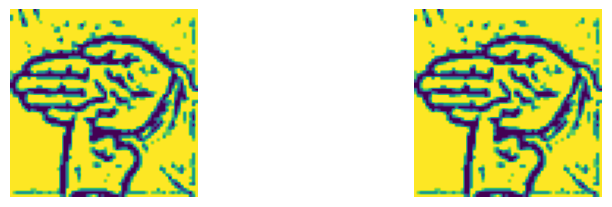

In [ ]:
#Mã này sẽ hiển thị các hình ảnh đại diện cho mỗi nhãn duy nhất trong tập huấn luyện, giúp người dùng dễ dàng hình dung dữ liệu mà mô hình đang học
alpha = [chr(c) for c in range(65,91)]
un,count = np.unique(y_train,return_counts=True)
j=1
plt.figure(figsize=(20,20))
for i in un:
    plt.subplot(7,4,j)
    plt.imshow(x_train[np.where(y_train == np.array(i))[0][0]])
    plt.axis('off')
    j=j+1

In [ ]:
map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

In [ ]:
# Đoạn mã này xây dựng một mô hình học sâu sử dụng Keras với cấu trúc mạng nơ-ron tích chập (CNN) để xử lý hình ảnh.

from tensorflow.keras import Input

model = Sequential([
    Input(shape=(64, 64, 1)),  # Thay thế input_shape trong lớp Conv2D bằng lớp Input
    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(35, activation='softmax')
])

In [ ]:
# hiển thị model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 584,675 (2.23 MB)

 Trainable params: 584,675 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

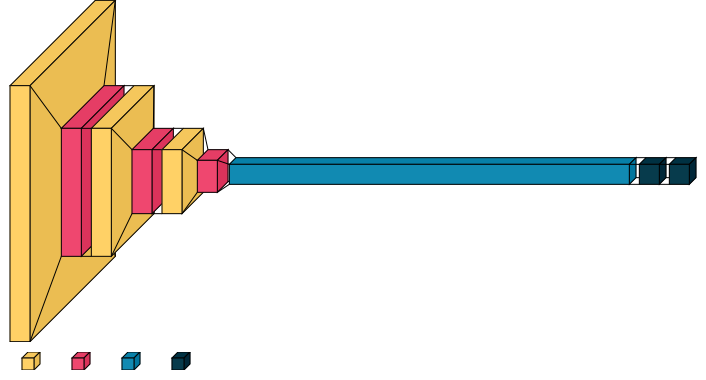

In [ ]:
visualkeras.layered_view(model,legend=True)

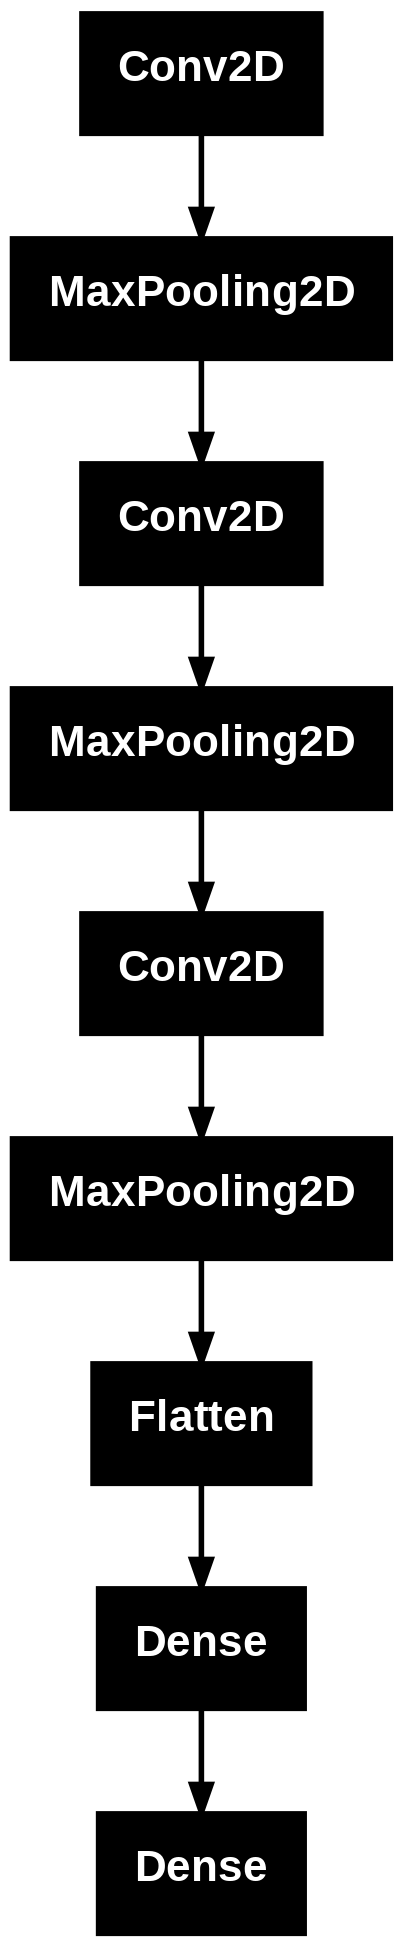

In [ ]:
keras.utils.plot_model(model)

In [ ]:
# thiết lập môi trường TensorFlow cho việc huấn luyện mô hình trên GPU, giúp đảm bảo rằng tài nguyên GPU được quản lý hiệu quả
try:
    session.close()
except:
    pass

# Tạo phiên mới
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [ ]:
# huấn luyện mô hình
classes = 35
epochs = 50
adam = Adam(learning_rate=0.00001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test), shuffle=True)

Epoch 1/50
1069/1069 - 288s - 269ms/step - accuracy: 0.4832 - loss: 2.6037 - val_accuracy: 0.9773 - val_loss: 0.5794
Epoch 2/50
1069/1069 - 326s - 305ms/step - accuracy: 0.9838 - loss: 0.1965 - val_accuracy: 0.9909 - val_loss: 0.0732
Epoch 3/50
1069/1069 - 363s - 339ms/step - accuracy: 0.9932 - loss: 0.0462 - val_accuracy: 0.9965 - val_loss: 0.0255
Epoch 4/50
1069/1069 - 283s - 265ms/step - accuracy: 0.9976 - loss: 0.0181 - val_accuracy: 0.9986 - val_loss: 0.0117
Epoch 5/50
1069/1069 - 322s - 301ms/step - accuracy: 0.9988 - loss: 0.0088 - val_accuracy: 0.9994 - val_loss: 0.0059
Epoch 6/50
1069/1069 - 322s - 301ms/step - accuracy: 0.9993 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 7/50
1069/1069 - 326s - 305ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.9996 - val_loss: 0.0024
Epoch 8/50
1069/1069 - 329s - 308ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.9996 - val_loss: 0.0018
Epoch 9/50
1069/1069 - 306s - 286ms/step - accuracy: 0.9999 - lo

In [ ]:

def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
class_labels = list(map_characters.values())

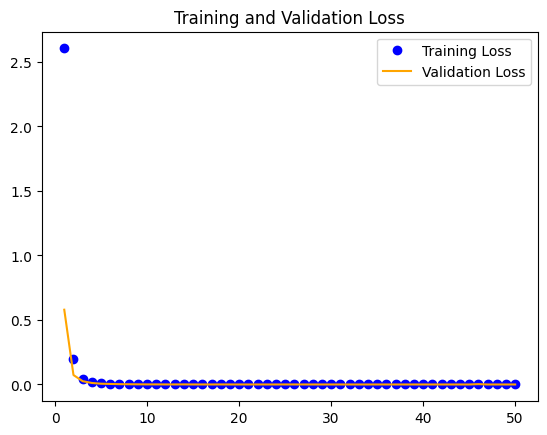

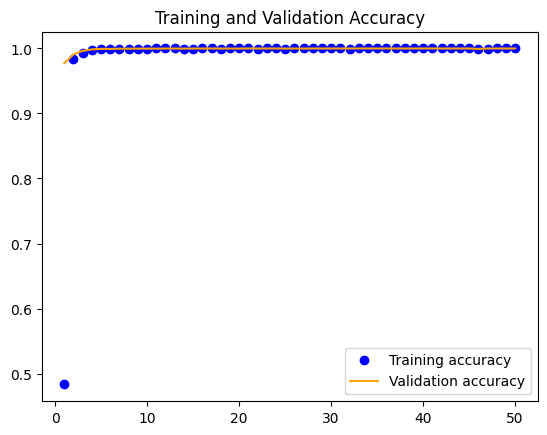

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [ ]:
score = model.evaluate(x_test,y_test, verbose=0)
print(score)
print('\nKeras CNN - accuracy:', score[1], '\n')

y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='')
Y_pred_classes = np.argmax(y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)

[1.2145957043685485e-05, 1.0]

Keras CNN - accuracy: 1.0 

268/268 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       259
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       237
           4       1.00      1.00      1.00       259
           5       1.00      1.00      1.00       241
           6       1.00      1.00      1.00       234
           7       1.00      1.00      1.00       236
           8       1.00      1.00      1.00       251
           9       1.00      1.00      1.00       255
           A       1.00      1.00      1.00       233
           B       1.00      1.00      1.00       252
           C       1.00      1.00      1.00       291
           D       1.00      1.00      1.00       214
           E       1.00      1.00      1.00       242
           F       1.00      1.00      1.00       268
           G       1.00      1.00

In [ ]:
model.save('ISL_Predictor.h5')

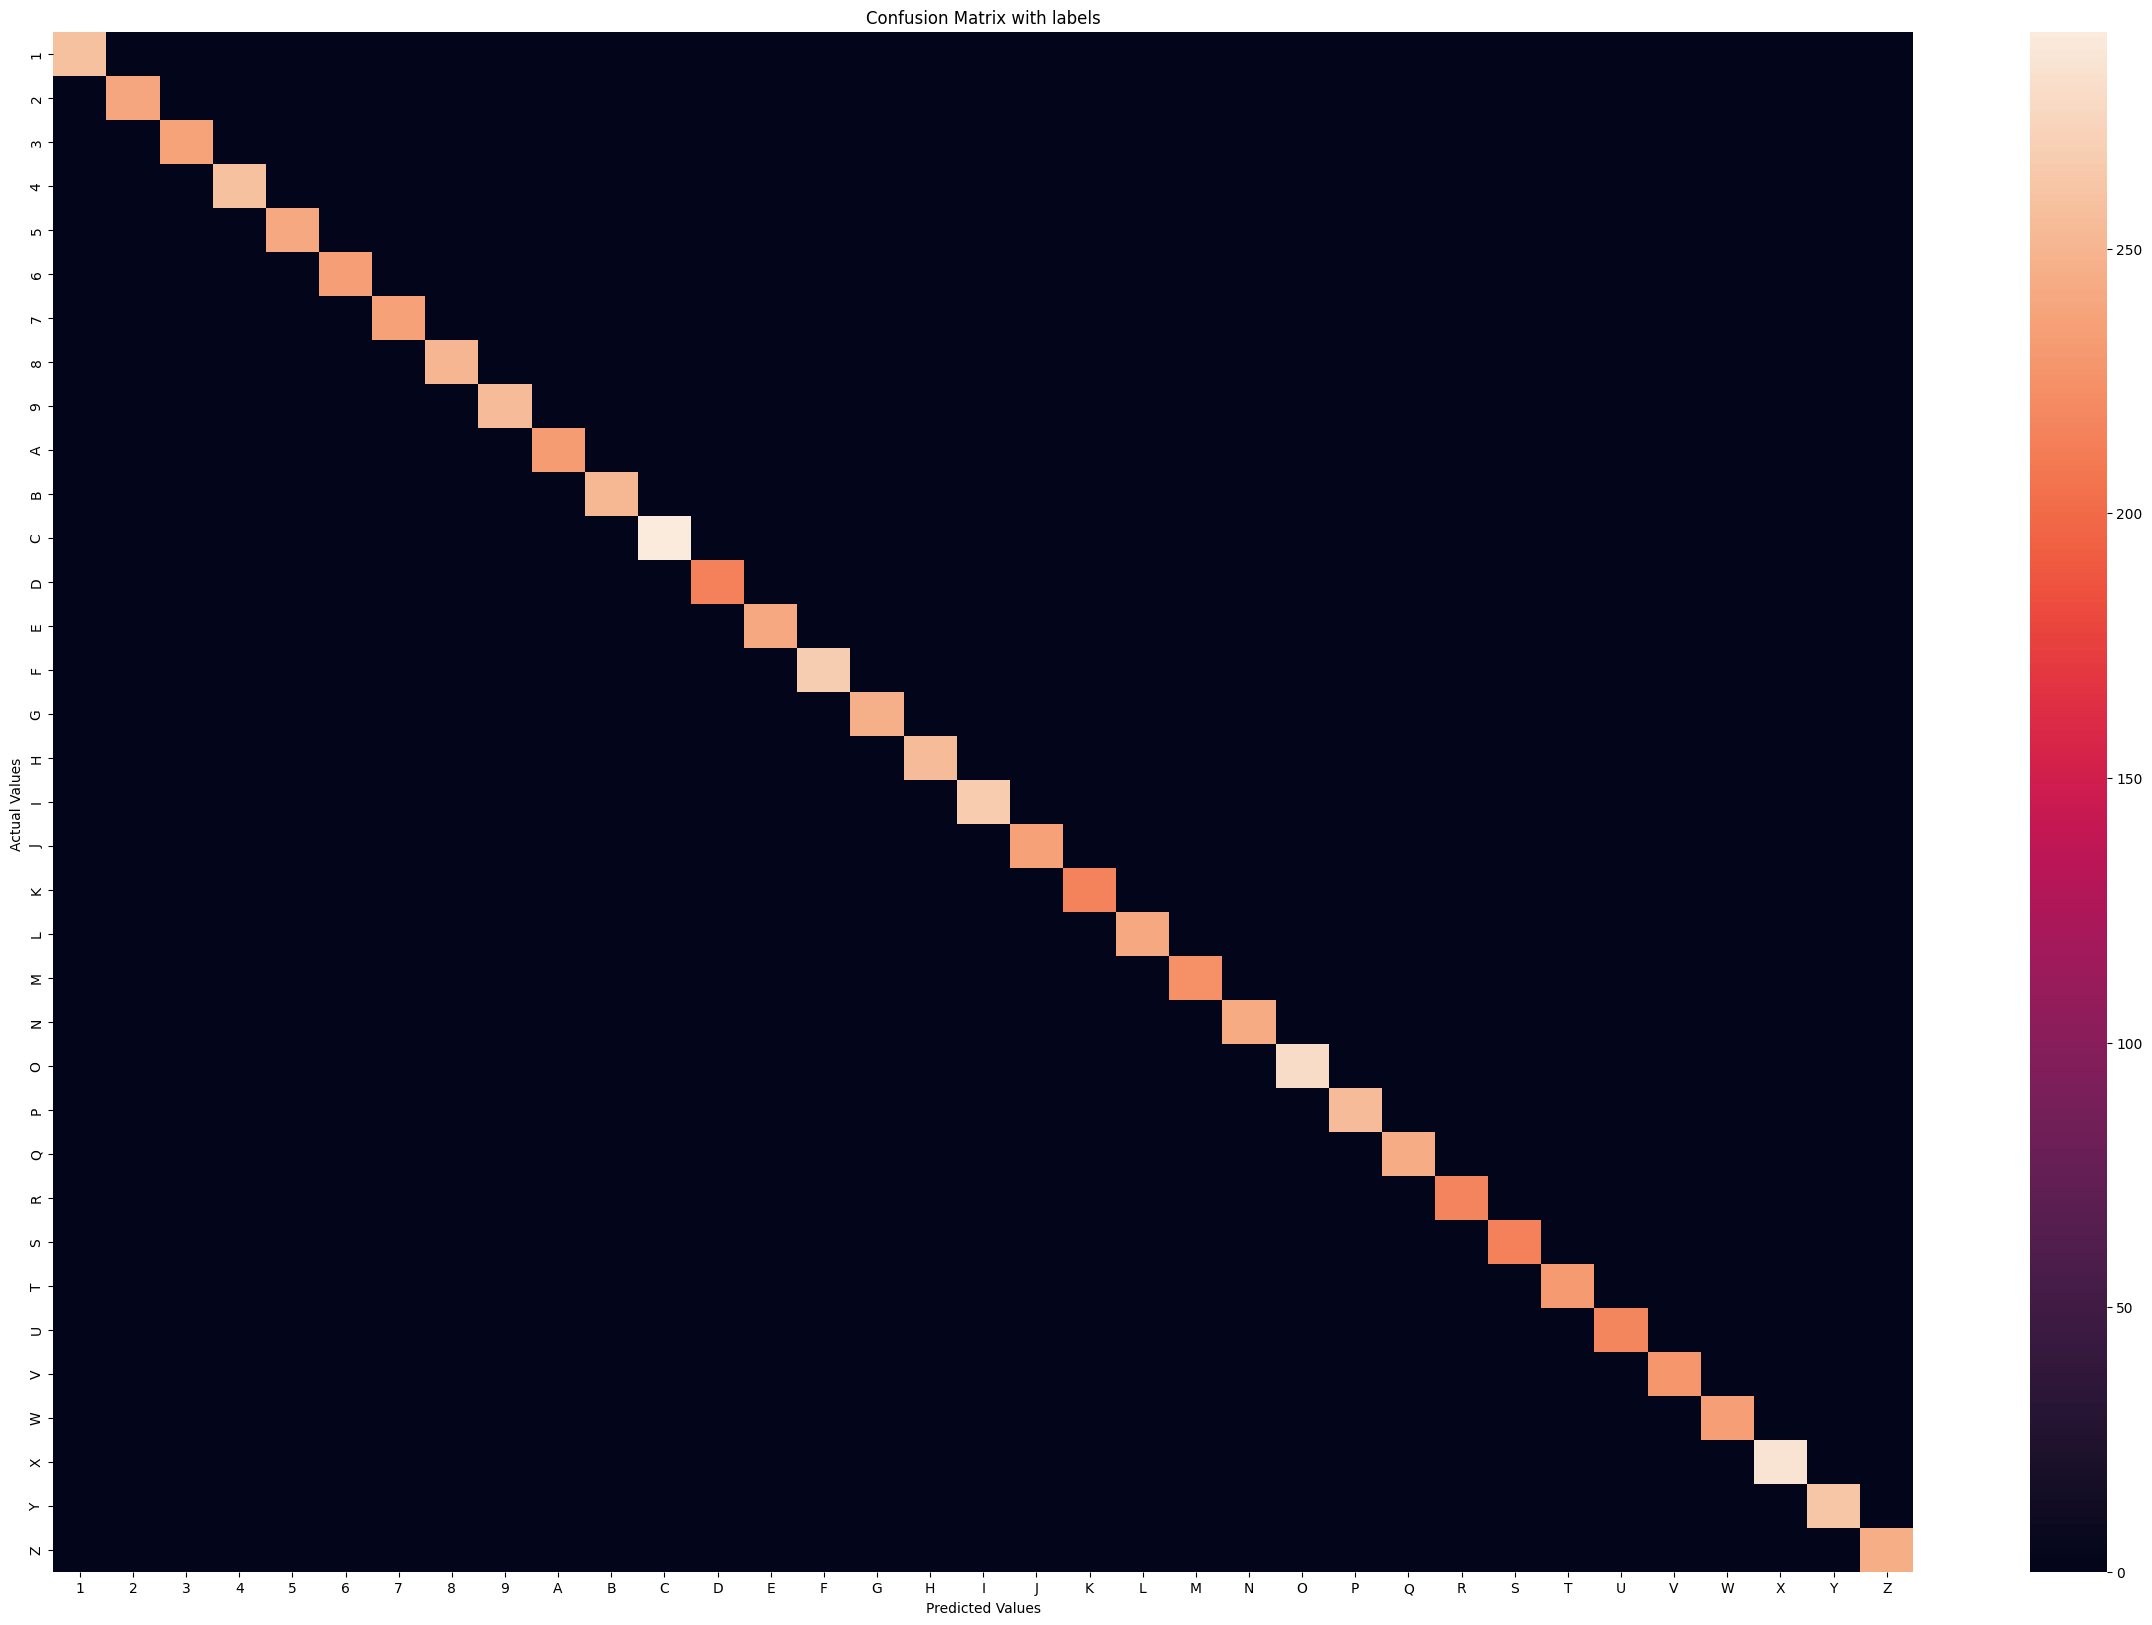

In [ ]:
plt.figure(figsize=(30, 20))

ax = sns.heatmap(metrics.confusion_matrix(Y_true,Y_pred_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [ ]:
confusion = metrics.confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[259   0   0 ...   0   0   0]
 [  0 239   0 ...   0   0   0]
 [  0   0 237 ...   0   0   0]
 ...
 [  0   0   0 ... 285   0   0]
 [  0   0   0 ...   0 262   0]
 [  0   0   0 ...   0   0 245]]


In [ ]:
model=tf.keras.models.load_model('ISL_Predictor.h5')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 584,677 (2.23 MB)

 Trainable params: 584,675 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)